# 💬 **Online Hate Speech And Detection Classification**

**Authors**:
1. Patrick Maina

2. Christine Ndungu

3. Teresia Njoki

4. George Nyandusi

## **1. 💼 Business Understanding**
### **1.1. Overview**
Safaricom, as Kenya's largest telecommunications provider, is a central figure in daily Kenyan life, leading to extensive online discourse across various platforms. This widespread interaction unfortunately includes instances of hate speech and abusive language, often directed at the company, its services, employees, or even customers. Such content can damage brand reputation, impact employee well-being, and erode customer trust. Manual moderation of this high volume of content is impractical. This project proposes an advanced Natural Language Processing (NLP) model specifically designed to detect and classify hate speech within online discussions concerning Safaricom, aiming to enhance brand protection, improve customer relations, and foster a more respectful online environment.

### **1.2. Problem Statement**
Safaricom faces growing challenges in managing hate speech directed at its brand, products, and employees on digital platforms. Customers frequently use social media to express frustrations with services such as M-PESA, customer care, and network coverage—often using emotionally charged or hostile language. The sheer volume of such content makes it difficult to manually monitor and respond effectively, exposing the company to reputational damage and delayed customer resolution. Moreover, distinguishing hate from genuine complaints is complicated by the informal, multilingual nature of online discourse in Kenya. Current moderation practices lack the scalability and contextual nuance required to handle these dynamics.

### **1.3. Challenges**
Safaricom encounters several key challenges in managing its digital presence and engaging effectively with users on online platforms. These challenges include:
- **High volume of unfiltered feedback**: with a large and vocal user base, Safaricom receives thousands of online mentions daily, making it difficult to filter and respond to critical or abusive messages in a timely manner.

- **Spread of harmful narratives**: negative or misleading content related to network issues, service delays, or product dissatisfaction can quickly gain traction, damaging brand reputation if left unaddressed.

- **Emotional and Abusive Interactions**: customer frustrations often manifest as hate speech or targeted abuse, particularly towards frontline staff, or specific services like M-PESA or customer care, creating a hostile environment.

- **Limited moderation capacity**: manually monitoring and responding to online hate speech or abuse is resource-intensive and prone to oversight, especially during peak complaint periods.

- **Complex language use**: online conversations often involve a mix of English, Kiswahili, and local dialects or slang, making it harder to consistently interpret sentiment and detect harmful content using traditional tools.

### **1.4. Objectives**
- Identify and flag hate speech and user complaints in real time.

- Distinguish between negative feedback/complaints and harmful speech, ensuring genuine concerns are not misclassified.

- Support brand protection strategies through early detection of online hostility.

- Contribute to safer, more respectful online interactions between the organization and the general public.

### **1.5. Specific Objectives**
- To apply data cleaning and preprocessing techniques in preparing the data for effective Machine Learning model development.

- To develop multi-class classifier models that label the tweets into seven distinct classes for efficient model prediction.

- To evaluate the classifier model performances using metrics such as F1-score, precision and recall.

## **2. 📊 Data Understanding**
In this step, we will explore the dataset to understand the kind of information it contains, the different features and their data types, as well as checking for things like missing values or unusual patterns. This will help us get a clear picture of the data before moving on to cleaning, preprocessing and vectorization.

The dataset contains the following features:
- Tweet ID: This is the unique ID of each tweet

- URL: This is the website link of each tweet

- Content: This is the actual text in the tweet

- Likes: This is the number of likes each tweet has received

- Retweets: This is the number of retweets/reposts each tweet has received

- Replies: This is the number of replies/engagements each tweet has received

- Quotes: This is the number of quotes each tweet has received

- Views: This is the number of times each tweet has been seen by different users

- Date: This is the date a specific tweet was created

### **2.1. Import Libraries**
For this project, we will implement the following tools and libraries:

- Numpy: for numerical computations

- Pandas: for data loading, cleaning and manipulation

- Seaborn: for data visualization and EDA

- Matplotlib: for data visualization and EDA

- Plotly: for interactive visualizations

- Scikit-Learn: for data preprocessing, predictive modeling and model evaluation

- NLTK: the Natural Language Toolkit for Natural Language Processing tasks

- Re: The Regex library for text cleaning and manipulation.

- Transformers: provides pre-trained state-of-the-art models for NLP tasks such as text classification, with simple APIs for PyTorch and TensorFlow.

- Torch: Deep Learning framework that is implemented together with the pre-trained transformers.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from wordcloud import WordCloud
from IPython.display import Image, display
# from imblearn.over_sampling import SMOTE

# nltk libraries
import nltk
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# deep learning libraries
from transformers import BertTokenizer, XLMRobertaTokenizer, AutoTokenizer, TrainingArguments, Trainer
import torch
from torch.utils.data import Dataset
from transformers import BertForSequenceClassification, XLMRobertaForSequenceClassification, AutoModelForSequenceClassification

# custom class functions
from data_prep.data_loader import DataLoader
from data_prep.feature_engineering import FeatureEngineering
from data_prep.modeling import Modeling

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 2.2. **Data Loading and Inspection**
In this section, we will load the dataset, and check the info, as well as the summary statistics.

In [ ]:
# load the dataset using the DataLoader class
loader = DataLoader('data/raw/labeled_data_openai.csv')
data = loader.load_data()
data.head()

Dataset loaded successfully from data/raw/labeled_data_openai.csv


,Tweet ID,URL,Content,Likes,Retweets,Replies,Quotes,Views,Date,Labels
0,1.950000e+18,https://x.com/MawiaDorothy/status/194955836816...,How comes I have overdue debts.. na sijakopa.....,1,0,0,0,21,"July 27, 2025 at 07:51 PM",Customer care complaint
1,1.950000e+18,https://x.com/KruiGeofrey/status/1949310365839...,@Monty_Hasashi @Safaricom 😂😂,0,0,0,0,22,"July 27, 2025 at 03:26 AM",Neutral
2,1.950000e+18,https://x.com/martozgicha/status/1949022872242...,"@safaricom weka data ,wacheni jokes...Thank yo...",0,0,0,0,6,"July 26, 2025 at 08:23 AM",Neutral
3,1.950000e+18,https://x.com/liyansmutembei/status/1948476756...,@SafaricomPLC Hello @SafaricomPLC @safaricom...,0,0,0,0,47,"July 24, 2025 at 08:13 PM",Neutral
4,1.950000e+18,https://x.com/SsirNixoNdugire/status/194833516...,@PeterNdegwa_ @SafaricomPLC @Safaricom_Care @S...,0,0,0,0,5,"July 24, 2025 at 10:51 AM",Neutral


In [ ]:
# check the dataset info
loader.check_dataset_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweet ID  6146 non-null   float64
 1   URL       6146 non-null   object 
 2   Content   6146 non-null   object 
 3   Likes     6146 non-null   int64  
 4   Retweets  6146 non-null   int64  
 5   Replies   6146 non-null   int64  
 6   Quotes    6146 non-null   int64  
 7   Views     6146 non-null   int64  
 8   Date      6146 non-null   object 
 9   Labels    6146 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 480.3+ KB
None

Dataset shape: (6146, 10)
Memory usage: 3.38 MB


From the `info()` method, we can note the following:
- The dataset contains a total of `6146` records, and 10 columns

- We have 4 columns that are of the `object` data type, and 6 columns that are of the `int` and `float` data types.

Since we have no missing values in our dataset which is to be expected, we will check for duplicates.

In [ ]:
# check for duplicates
loader.check_duplicates()

Number of duplicate rows: 0
No duplicate rows found.


0

From the code above, our data has no duplicate rows.

Next, we will check the distribution of the target variable (Labels) to get a better understanding of our target.

In [ ]:
# check the distribution of the target variable
loader.analyze_target_distribution()

Distribution of the target variable:
Labels
Neutral                                 3261
Customer care complaint                  669
Internet or airtime bundle complaint     531
Hate Speech                              486
Network reliability problem              444
MPESA complaint                          439
Data protection and privacy concern      316
Name: count, dtype: int64


Labels
Neutral                                 3261
Customer care complaint                  669
Internet or airtime bundle complaint     531
Hate Speech                              486
Network reliability problem              444
MPESA complaint                          439
Data protection and privacy concern      316
Name: count, dtype: int64

From the target distribution above, we can note the following:
- The dataset contains 7 distinct classes

- The largest class is Neutral (3261 samples), making up more than half of the data.

- The next most common classes are Customer care complaint (669), Internet or airtime bundle complaint (531), Hate Speech (486), Network reliability problem (444), MPESA complaint (439), and Data protection and privacy concern (316).

- There is a clear class imbalance, with Neutral tweets dominating and some complaint categories and hate speech being much less frequent.

- This imbalance should be considered during model training, as it may affect classification performance.

We can show a visual representation of the labels as illustrated below:

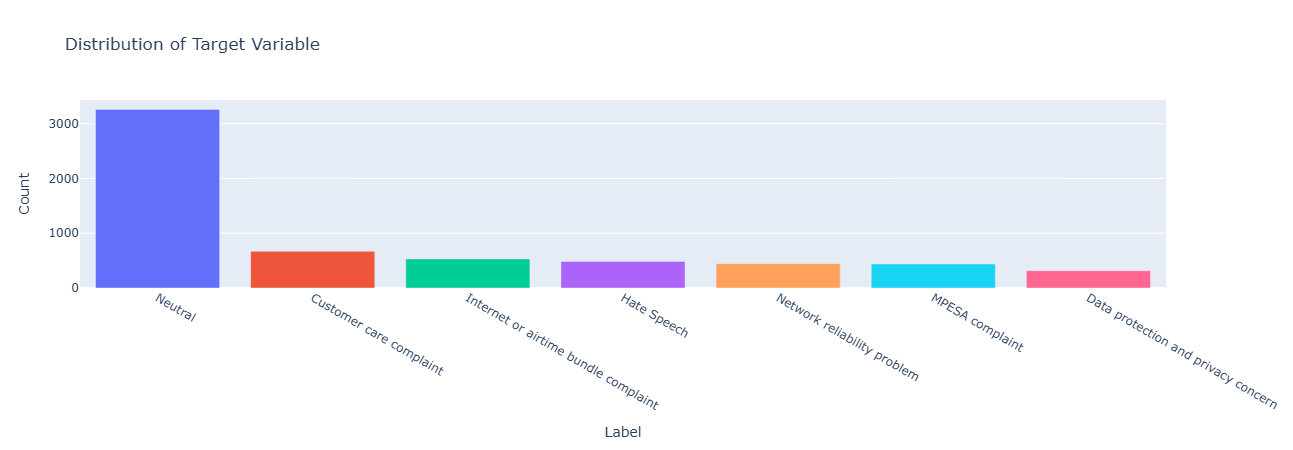

In [ ]:
# plot the distribution of the target variable
loader.plot_target_distribution()

# # Display the image (so it appears in PDF)
display(Image("plotly_images/target_distribution.png"))

## **2.3. Exploratory Data Analysis (EDA)**
In this section, we will perform a systematic investigation of the dataset to extract insights, evaluate feature distributions, assess the relationship between the feature and target variables, and identify anomalies, outliers or data quality issues. This will guide the selection of appropriate modeling techniques.

### **2.3.1. Distribution of Text Length**
In this plot, we will check the distribution of text lengths in the dataset to understand the typical length of tweets and identify any potential issues with very short or very long texts.

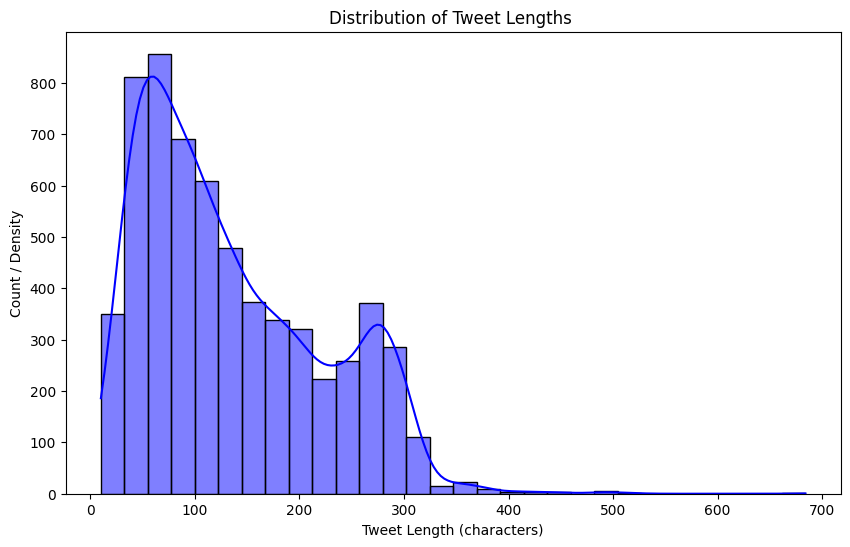

In [ ]:
# create the tweets length column
data['tweet_length'] = data['Content'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths ')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Count / Density')
plt.show()

The histogram plot above shows the distribution of the lengths of each tweet. From the plot, most tweets fall within the `50 to 150` character range, with a noticeable peak around the `75-100` character mark. As the tweet length increases, the frequency drops significantly, with very few tweets exceeding `300` characters.

### **2.3.2. Time-series distribution of tweets**
In this section, we will break down the 'Date' column into the day of the week, and the hour to get more insights on user interactions over time.

In [ ]:
# convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# create the day of week and hour columns
data['day_of_week'] = data['Date'].dt.day_name()
data['hour'] = data['Date'].dt.hour

/tmp/ipykernel_28036/94052862.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



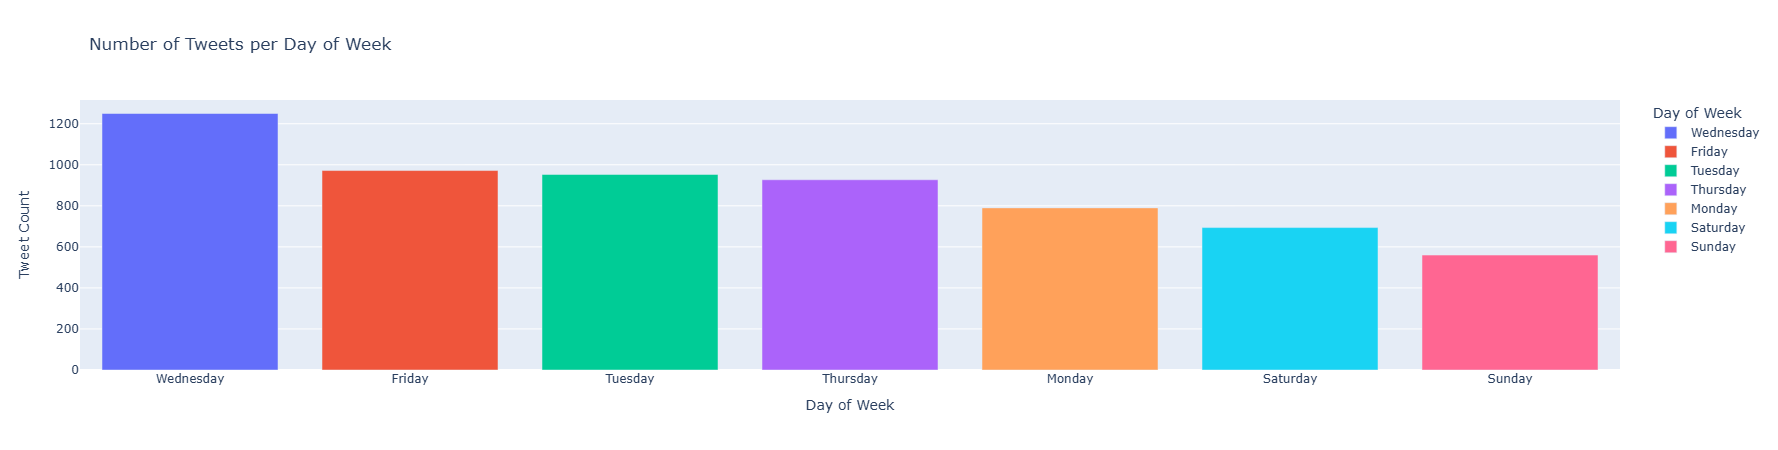

In [ ]:
# create the plot for the day of week distribution
day_counts = data['day_of_week'].value_counts().reset_index()
day_counts.columns = ['Day of Week', 'Tweet Count']  # Rename columns for clarity

fig = px.bar(
    day_counts,
    x='Day of Week',
    y='Tweet Count',
    color='Day of Week',  # Add color by day
    labels={'Day of Week': 'Day of Week', 'Tweet Count': 'Tweet Count'},
    title='Number of Tweets per Day of Week'
)
fig.show()

# # Display the image (so it appears in PDF)
display(Image("plotly_images/num_tweets_per_day.png"))

The plot above displays a bar plot showing the number of tweets posted on each day of the week. Each bar represents a day (e.g., Monday, Tuesday, etc.), and its height indicates the total tweet count for that day. This visualization helps identify which days have the highest or lowest user engagement, revealing patterns such as peak complaint or interaction periods. Such insights can guide staffing, moderation efforts, or targeted customer support.

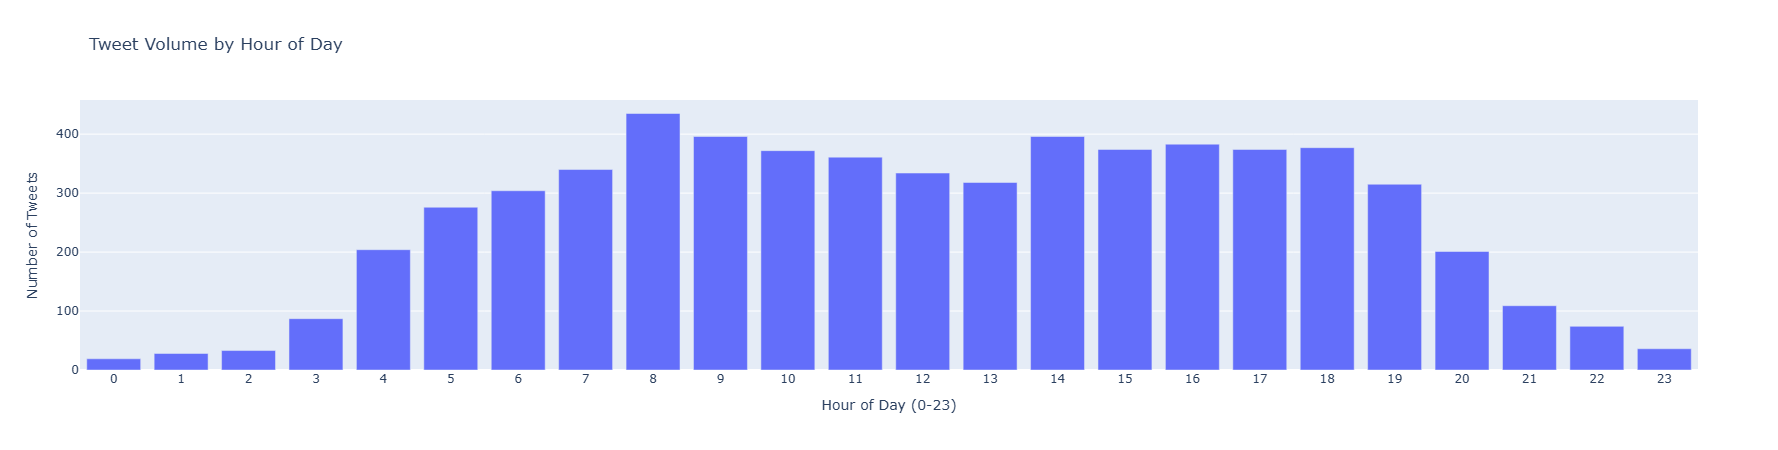

In [ ]:
# create a plot for the tweet count by hour of day
# Count tweets per hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a bar plot with Plotly
fig = px.bar(
    x=hourly_counts.index,
    y=hourly_counts.values,
    labels={'x': 'Hour of Day (0-23)', 'y': 'Number of Tweets'},
    # color='labels',
    title='Tweet Volume by Hour of Day'
)
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1)
)
fig.show()

# # Display the image (so it appears in PDF)
display(Image("plotly_images/tweet_count_by_hour.png"))

The plot above displays a bar plot showing the number of tweets posted during each hour of the day (from 0 to 23). Each bar represents an hour, and its height indicates the tweet volume for that hour. This visualization helps identify peak activity periods, revealing when users are most active or likely to post complaints or feedback. Such insights can inform optimal times for monitoring, customer support staffing, or targeted interventions. The plot uses a linear x-axis for clear comparison across all hours.

### **2.3.3. Distribution of tweets by year**
In this section, we will analyze the distribution of tweets over the years to identify trends and patterns in user engagement and complaint reporting.

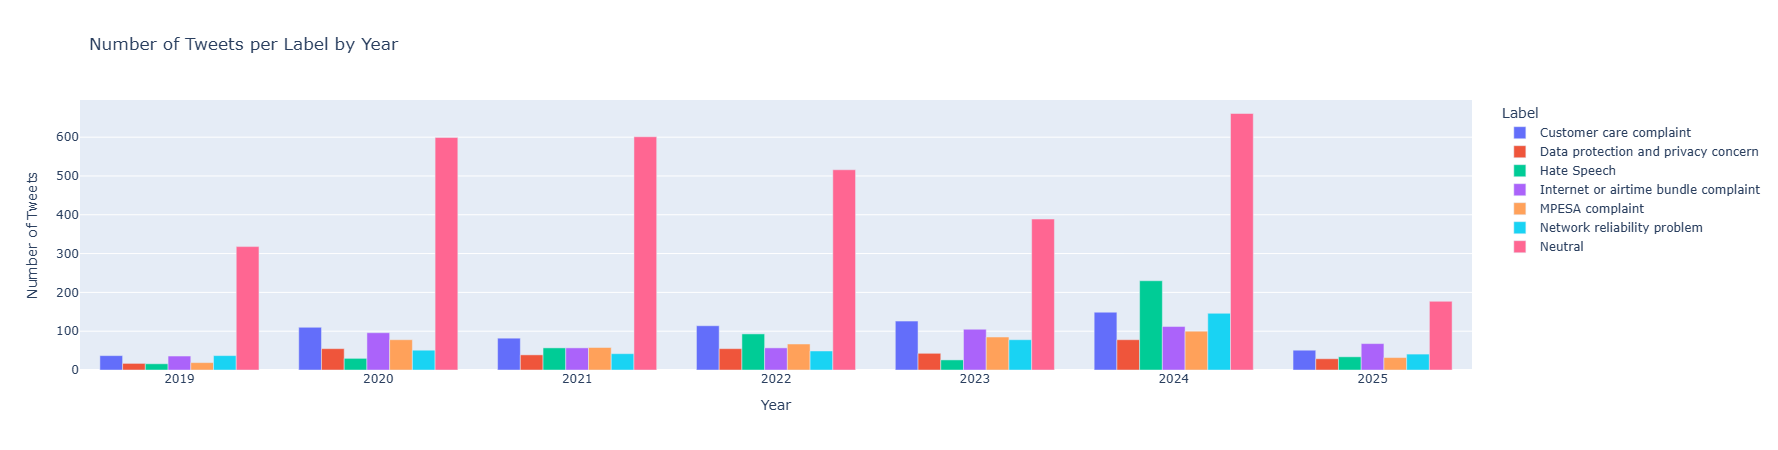

In [ ]:
# extract the year from the date column
data['year'] = data['Date'].dt.year

# group by year and count tweets
yearly_counts = data.groupby(['year', 'Labels']).size().reset_index(name='count')

# create the bar plot
fig = px.bar(
    yearly_counts,
    x='year',
    y='count',
    color='Labels',
    barmode='group',
    labels={'year': 'Year', 'count': 'Number of Tweets', 'Labels': 'Label'},
    title='Number of Tweets per Label by Year',
    # width=1300,      # Set plot width
    # height=600       # Set plot height
)
fig.show()

# # Display the image (so it appears in PDF)
display(Image("plotly_images/num_tweets_by_year.png"))

### **2.3.4. Word Cloud**
A Word Cloud is a visual representation of text data where the size of each word reflects its frequency or importance within a corpus. Common or frequently used words appear larger and more prominently, while less common words are displayed in smaller font sizes. Word Clouds are useful for quickly identifying the most important terms in a dataset and can provide insights into the main topics or themes present in the text.

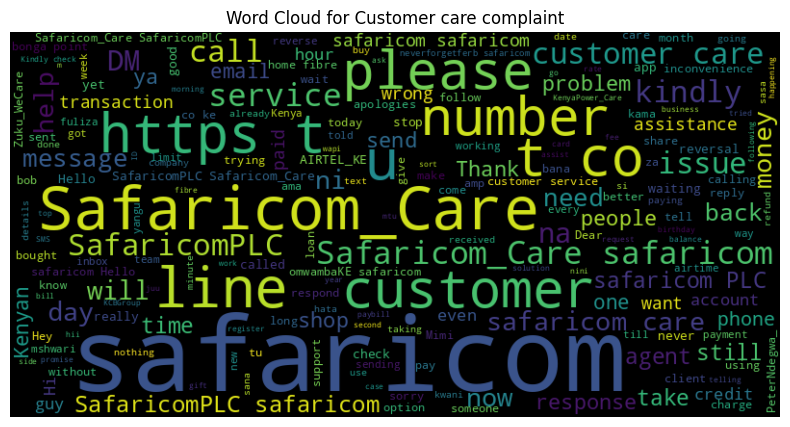

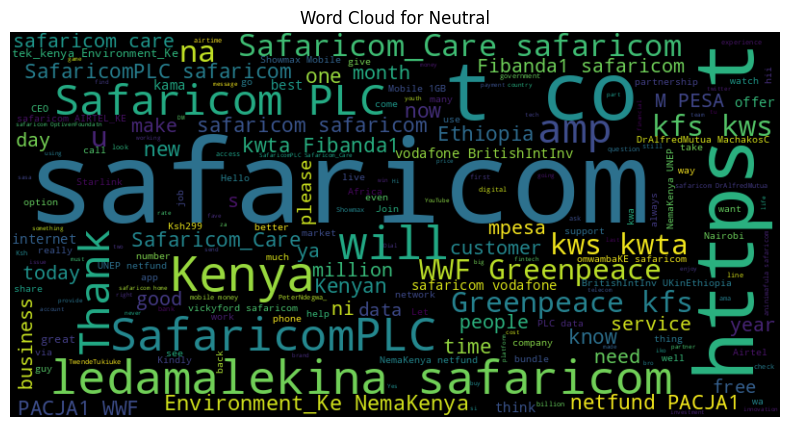

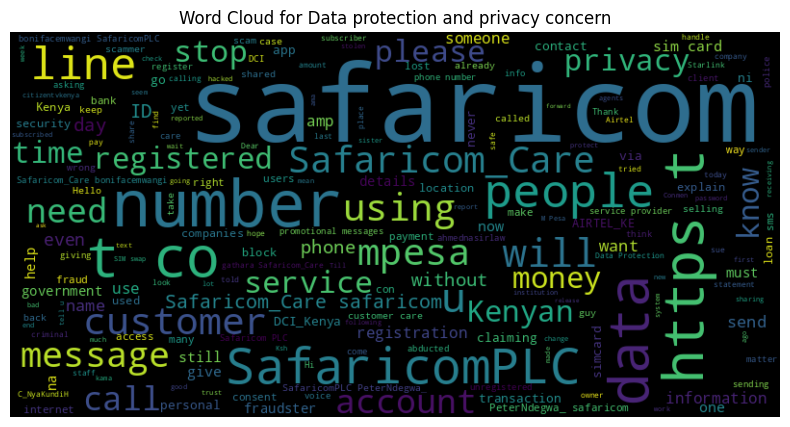

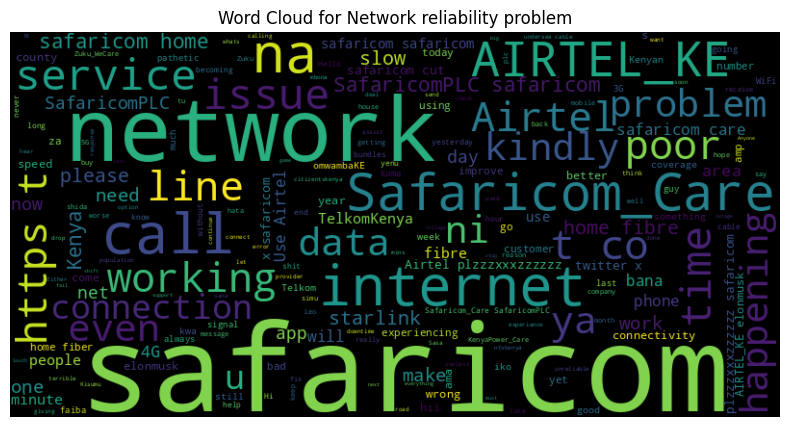

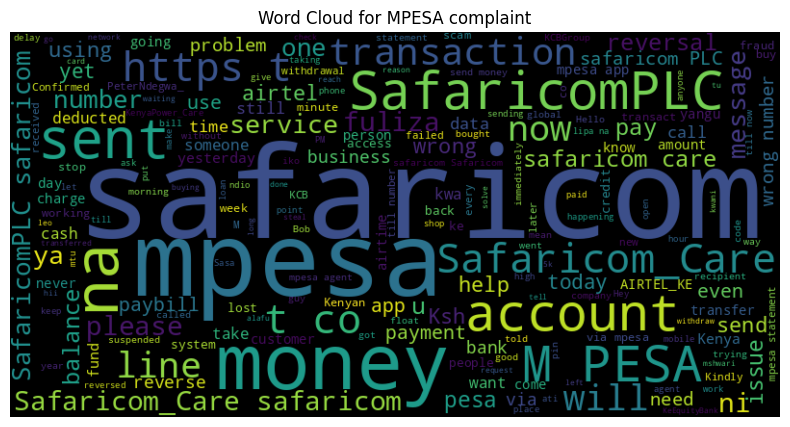

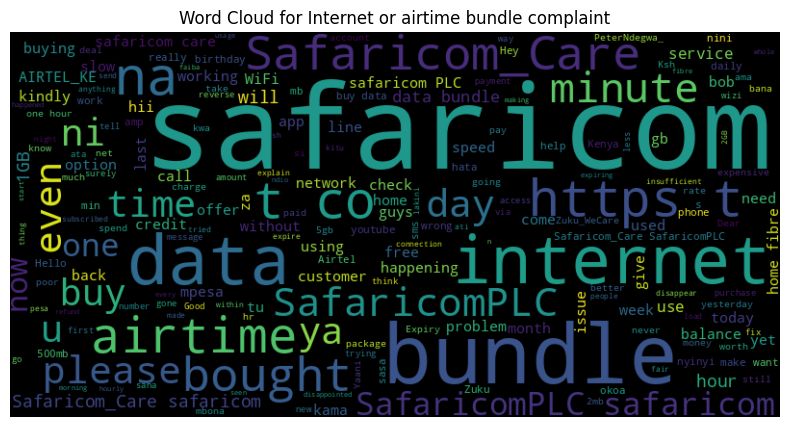

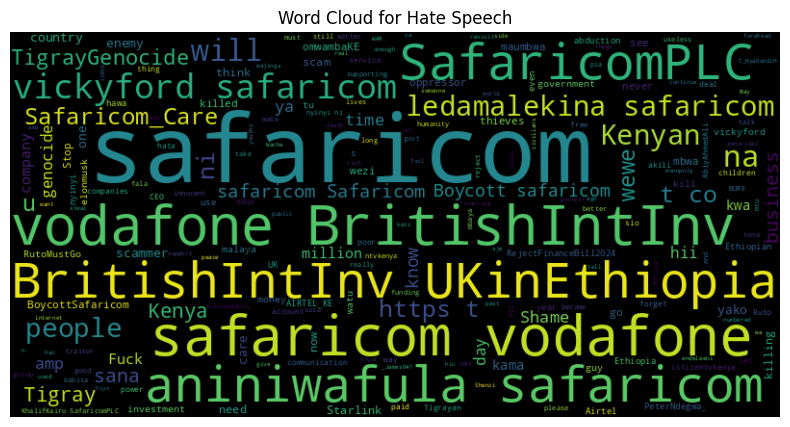

In [ ]:
# create the word cloud plots for each label
for label in data['Labels'].unique():
    text = " ".join(data[data['Labels'] == label]['Content'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()

## **3. Feature Engineering, Data Cleaning, Preprocessing and Vectorization**
In this section, we will perform the following steps:
- Generate new features that will aid in the modeling step (chars, words and sentences)

- Removes unneccessary columnns (Tweet ID and URL)

- Cleans the text (removal of emojis, URLs, hashtags, mentions, etc)

- Tokenizes the text

- Lemmatizes the text

-  Handles missing labels if any (optional)

- Saves the preprocessed data

- Prepares the data for modeling (splits the data into train and test sets)

- Vectorizes the input text

For all these functionalities, we created a preprocess pipeline that will run through all these steps one by one. This pipeline is contained in the FeatureEngineering class.

In [ ]:
# use the FeatureEngineering class for creating new features, data cleaning, data preprocessing and vectorization
fe = FeatureEngineering(data)
X_train_vec, X_test_vec, y_train, y_test, vectorizer = fe.process_pipeline()

Starting feature engineering pipeline...
Generating text features...
Added features: chars, words, sentences
Removed columns: ['Tweet ID', 'URL']
Cleaning text data...
Text cleaning completed.
Tokenizing text...
Tokenization completed.
Lemmatizing text...
Lemmatization completed.
Creating processed text...
Processed text creation completed.
Handling missing values in 'Labels' column...
Removed 0 rows with 'unknown' labels.
Processed data saved to data/cleaned_safaricom_data.csv
Prepared data for modeling:
Features shape: (6146, 16)
Target shape: (6146,)
Splitting data with test_size=0.2, random_state=42
Training set shape: (4916, 16)
Testing set shape: (1230, 16)
Vectorizing text using COUNT vectorizer...
Training features shape: (4916, 5000)
Testing features shape: (1230, 5000)
Vocabulary size: 5000


From the output above, we can note the following:
- The FeatureEngineering class successfully encapsulates all preprocessing steps.

- The data has been cleaned, tokenized, lemmatized and split into train and test sets. The train set contains `4916` records, while the test set contains `1230` records.

- After vectorization, the number of features have increased to `5000`


## **4. Modeling**
In this section, we will train three Scikit-Learn models namely:
- Logistic Regression (baseline model)

- Naive Bayes

- Random Forest

To perform the training, we will use the `train_and_evaluate_all_models` function in the `Modeling` class that trains and evaluates all the three models, and generates classification reports.

In [ ]:
# use the Modeling() class to train and evaluate all models
modeler = Modeling()
results = modeler.train_and_evaluate_all_models(X_train_vec, y_train, X_test_vec, y_test)

Training and evaluating all models...
Training Logistic Regression model...
Logistic Regression model trained successfully.
Evaluating Logistic Regression...
Logistic Regression Results:
Accuracy: 0.6959
Precision: 0.7151
Recall: 0.6959
F1-Score: 0.7027

Classification Report:
                                      precision    recall  f1-score   support

             Customer care complaint       0.41      0.51      0.45       116
 Data protection and privacy concern       0.57      0.49      0.53        63
                         Hate Speech       0.49      0.67      0.57        99
Internet or airtime bundle complaint       0.68      0.67      0.67       105
                     MPESA complaint       0.65      0.70      0.67        92
         Network reliability problem       0.60      0.62      0.61        90
                             Neutral       0.84      0.77      0.80       665

                            accuracy                           0.70      1230
                  

From the output above, the Logistic regression model produces a higher F1-score which is the main performance metric.

We can get a tabular representation of the model performance for more clarity.

In [ ]:
# compare all the models
modeler.compare_models()

Model Comparison:
              Model  accuracy  precision  recall  f1_score
Logistic Regression    0.6959     0.7151  0.6959    0.7027
        Naive Bayes    0.6846     0.6770  0.6846    0.6752
      Random Forest    0.6886     0.6606  0.6886    0.6537


,Model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.695935,0.715119,0.695935,0.702737
1,Naive Bayes,0.684553,0.676981,0.684553,0.675188
2,Random Forest,0.688618,0.660607,0.688618,0.653695


Next, we can plot the confusion matrix for the Logistic Regression model to measure the rate of true and false positives and negatives for all the classes.

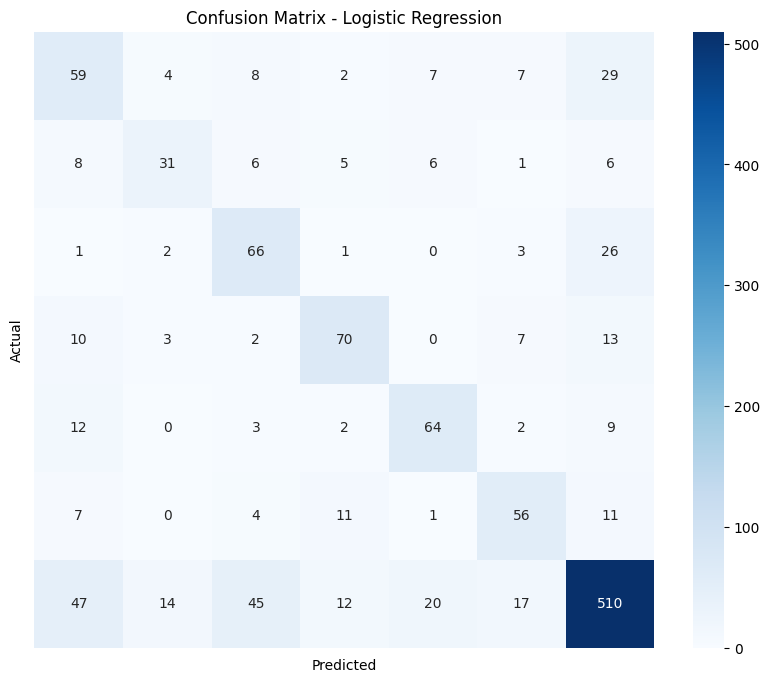

In [ ]:
# plot the confusion matrix for the best model
modeler.plot_confusion_matrix()

## **5. Predictions**
In this section, we will run actual predictions on sample new tweets to measure the performance of the best model.

In [ ]:
# predict on some new tweets
test_tweets = [
    "Safaricom network is very slow today, I can't browse properly",
    "There have been so many abductions in the country and I bet Safaricom is sharing our information",
    "Thank you Safaricom for the great service today",
    "My MPESA transaction failed again, this is frustrating"
]

print("Testing predictions on sample tweets:")
for i, tweet in enumerate(test_tweets, 1):
    prediction = modeler.predict_new_text(tweet, vectorizer)
    print(f"{i}. Tweet: {tweet}")
    print(f"   Prediction: {prediction}")
    print()

Testing predictions on sample tweets:
1. Tweet: Safaricom network is very slow today, I can't browse properly
   Prediction: Network reliability problem

2. Tweet: There have been so many abductions in the country and I bet Safaricom is sharing our information
   Prediction: Data protection and privacy concern

3. Tweet: Thank you Safaricom for the great service today
   Prediction: Neutral

4. Tweet: My MPESA transaction failed again, this is frustrating
   Prediction: MPESA complaint



## 6. Deep Learning Model Fine-Tuning

In this section, we will implement SOTA transformer models from Hugging Face by fine-tuning them to our dataset, training, evaluating and making predictions on new tweets. This will help us in achieving better performance using advanced deep learning techniques

We will first start by loading the processed train, validation and test datasets.

In [1]:
# check for GPU availability
!nvidia-smi

Tue Aug 12 07:45:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   48C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# install wandb and disable it to allow training without requiring an API key or logging
!pip install wandb --quiet
import os
os.environ["WANDB_DISABLED"] = "true"

In [4]:
# load the preprocessed train, validation and test datasets
import pandas as pd
train_df = pd.read_csv('train_processed.csv')
val_df = pd.read_csv('val_processed.csv')
test_df = pd.read_csv('test_processed.csv')

In [5]:
# view the first 5 rows in train dataset
train_df.head()

,Content,Likes,Retweets,Replies,Quotes,Views,Labels,cleaned_sentence,encoded_labels
0,@ledamalekina @safaricom Exactly,1,0,0,0,0,Neutral,ledamalekina safaricom Exactly,6
1,@InteriorKE And why are FanakaLotto still oper...,0,0,0,0,0,Data protection and privacy concern,InteriorKE And why are FanakaLotto still opera...,1
2,@safaricom rudisheni hii na mnipee bundles .sa...,1,0,0,0,16,Internet or airtime bundle complaint,safaricom rudisheni hii na mnipee bundles sasa...,3
3,@RobertAlai @safaricom @PeterNdegwa_ Hii manen...,0,0,0,0,48,Neutral,RobertAlai safaricom PeterNdegwa Hii maneno pe...,6
4,"@evenmaina @safaricom PLC I hate you , mlikwam...",0,0,0,0,16,Customer care complaint,evenmaina safaricom PLC I hate you mlikwamilia...,0


In [6]:
# Check the distribution of the target variable in the training data
label_counts = train_df['encoded_labels'].value_counts().sort_index()
print("Class distribution in training data:")
print(label_counts)

Class distribution in training data:
encoded_labels
0     327
1     155
2     238
3     260
4     215
5     218
6    1598
Name: count, dtype: int64


### XLM-RoBERTa Fine-Tuning
In this section, we will leverage on the XLM-RoBERTa model to train and evaluate on our dataset. The XLM-RoBERTa model is a large multilingual masked language model trained on 2.5TB of filtered CommonCrawl data across 100 languages. It shows that scaling the model provides strong performance gains on high-resource and low-resource languages. The model uses the RoBERTa pretraining objectives on the XLM model.

We will first start by instantiating the model tokenizer for tokenizing our dataset.

In [7]:
# initialize the pre-trained XLM-RoBERTa tokenizer
from transformers import BertTokenizer, XLMRobertaTokenizer, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-large')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Next, we will implement a function that tokenizes the text using the pre-defined tokenizer.

In [8]:
'''
Tokenizes a list of texts using the pre-defined tokenizer.

Args:
    texts (list or pd.Series): List or Series of sentences to tokenize.
    max_length (int): Maximum sequence length after padding/truncation.

    Returns:
    dict: Dictionary of tokenized outputs as PyTorch tensors.
'''
def tokenize_texts(texts, max_length=256):
    return tokenizer(
        list(texts),
        padding='max_length', # pad shorter texts to max_length
        truncation=True, # truncate longer texts
        max_length=max_length,
        return_tensors='pt' # return PyTorch tensors
    )
# Tokenize the cleaned sentences from each dataset split for model input
train_tokens = tokenize_texts(train_df['cleaned_sentence'].tolist())
val_tokens = tokenize_texts(val_df['cleaned_sentence'].tolist())
test_tokens = tokenize_texts(test_df['cleaned_sentence'].tolist())

In order to implement our encoded labels in the model, we have to convert them into Tensors. A tensor is a multi-dimensional array used to represent data. It generalizes vectors and matrices to any number of dimensions, making it the fundamental data structure for neural networks. Tensors store inputs, outputs, and intermediate values within the network, and their properties allow for efficient computations on specialized hardware like GPUs and TPUs.

In [9]:
'''
Convert label columns from each dataset split into PyTorch tensors
For compatibility with model training and loss calculation
'''
import torch

train_labels = torch.tensor(train_df['encoded_labels'].values)
val_labels = torch.tensor(val_df['encoded_labels'].values)
test_labels = torch.tensor(test_df['encoded_labels'].values)

Next, we will define a custom Pytorch dataset. This will help in handling tokenized inputs and labels for tweet classification. It allows easy batching and data loading during the training and evaluation stages

In [10]:
# define the custom Pytorch Dataset
from torch.utils.data import Dataset

class TweetDataset(Dataset):
  """
  A custom Pytorch dataset for handling tokenized inputs and labels for tweet classification
  It allows easy batching and data loading during training and evaluation
  """
  def __init__(self, tokens, labels):
    """
    Args:
        tokens (list): Tokenized inputs like input_ids and attention mask (Pytorch tensors).
        labels (torch.Tensor): Corresponding labels tensor
    """
    self.tokens = tokens
    self.labels = labels

  def __getitem__(self, idx):
    """
    Retrieve a single sample by index

    Returns:
        dict: Toknized inputs and corresponding labels
    """
    item = {key: val[idx] for key, val in self.tokens.items()}
    item['labels'] = self.labels[idx]
    return item

  def __len__(self):
    # returns the total number of samples
    return len(self.labels)

In [11]:
# create the dataset objects for train, validation and test sets
train_dataset = TweetDataset(train_tokens, train_labels)
val_dataset = TweetDataset(val_tokens, val_labels)
test_dataset = TweetDataset(test_tokens, test_labels)

#### Model Training and Optimization

In this section, we will initialize the training process. We first load the pre-trained XLM-RoBERTa model with a classification head for 7 distinct classes.

In [12]:
from transformers import BertForSequenceClassification, XLMRobertaForSequenceClassification, AutoModelForSequenceClassification

# load the pre-trained XLM-RoBERTa model with a classification head for 7 classes
model = AutoModelForSequenceClassification.from_pretrained('xlm-roberta-large', num_labels=7)

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Next, we define the model training configurations and hyperparameters for the trainer API.

In [13]:
# define the training configurations and hyperparameters for the trainer API
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='/content/results/',     # output directory
    num_train_epochs=10,                # number of training epochs
    per_device_train_batch_size=16,     # training batch size per device
    per_device_eval_batch_size=16,      # evaluation batch size
    eval_strategy='epoch',              # evaluate at the end of each epoch
    save_strategy='epoch',              # save checkpoint every epoch
    learning_rate=2e-5,                 # learning rate
    weight_decay=0.01,                  # weight decay for regularization
    logging_dir=None,                   # logging directory
    logging_steps=50,                   # log every 50 steps
    load_best_model_at_end=False,       # load the best model at the end of training
    metric_for_best_model='f1',         # metric to monitor for best model
    greater_is_better=True              # higher metric values are better
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Next, we will create a function that computes the different performance metrics, i.e., precision, recall and f1-score. The function will return the accuracy, precision, recall and f1-score after every epoch (training step)

In [14]:
# define the metric computation function
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    """
    Compute accuracy, precision, recall, and F1-score for model evaluation.

    Args:
        eval_pred (tuple): Tuple containing logits (model outputs) and true labels.

    Returns:
        dict: Dictionary with 'accuracy', 'f1', 'precision', and 'recall' scores.
    """

    logits, labels = eval_pred
    # Convert logits to predicted class indices
    predictions = np.argmax(logits, axis=-1)

    # Calculate precision, recall, f1-score with weighted average (handles class imbalance)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

    # Calculate overall accuracy
    acc = accuracy_score(labels, predictions)

    # Return all metrics in a dictionary format expected by Trainer
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

Once the training configurations and the compute function have been developed, we can now initialize the trainer with the appropriate parameters. This will begin the model training process.

In [15]:
from transformers import Trainer

# initialize the Hugging Face trainer with model, datasets, tokenizer, and evaluation metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)


# initialize the training process
trainer.train()

/tmp/ipython-input-3117783210.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.346800,1.213432,0.630519,0.552948,0.526812,0.630519
2,0.839300,0.756805,0.753679,0.743663,0.749339,0.753679
3,0.613600,0.761669,0.756778,0.743543,0.762976,0.756778
4,0.466200,0.765685,0.778466,0.776812,0.783720,0.778466
5,0.313300,1.004963,0.765298,0.757971,0.784508,0.765298
6,0.212400,0.989219,0.797057,0.796653,0.800348,0.797057
7,0.124200,1.184335,0.796282,0.796607,0.799163,0.796282
8,0.112500,1.310860,0.801704,0.796759,0.795424,0.801704
9,0.050000,1.381094,0.792409,0.791830,0.794086,0.792409
10,0.032400,1.405556,0.791634,0.793119,0.796980,0.791634


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=1890, training_loss=0.41959853165994876, metrics={'train_runtime': 3345.0697, 'train_samples_per_second': 9.001, 'train_steps_per_second': 0.565, 'total_flos': 1.403046370082304e+16, 'train_loss': 0.41959853165994876, 'epoch': 10.0})

After the training process, we can now save the pre-trained model and tokenizer using the `save_pretrained()` function

In [32]:
# Save the fine-tuned model and tokenizer to the specified directory
# This allows loading the trained model/tokenizer later for inference or further training
model.save_pretrained('xlm_roberta_model/', use_new_zipfile_serialization=True)
tokenizer.save_pretrained('xlm_roberta_model/')

('xlm_roberta_model/tokenizer_config.json',
 'xlm_roberta_model/special_tokens_map.json',
 'xlm_roberta_model/sentencepiece.bpe.model',
 'xlm_roberta_model/added_tokens.json',
 'xlm_roberta_model/tokenizer.json')

#### Model Evaluation
In this section, we will evaluate the model on our test dataset.

In [17]:
# evaluate on the test dataset
from sklearn.metrics import classification_report
import numpy as np
import torch

# Get predictions from the trainer
results = trainer.evaluate(test_dataset)
print(results)

{'eval_loss': 1.3812061548233032, 'eval_accuracy': 0.789587852494577, 'eval_f1': 0.7905540732568063, 'eval_precision': 0.7925981896494484, 'eval_recall': 0.789587852494577, 'eval_runtime': 36.26, 'eval_samples_per_second': 50.855, 'eval_steps_per_second': 3.199, 'epoch': 10.0}


In [18]:
# Extract logits and labels
predictions = trainer.predict(test_dataset)
logits = predictions.predictions
labels = predictions.label_ids

# Convert logits to predicted class indices
predicted_labels = np.argmax(logits, axis=-1)

# Print the classification report
print(classification_report(labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       201
           1       0.63      0.61      0.62        95
           2       0.64      0.71      0.67       146
           3       0.74      0.81      0.77       159
           4       0.72      0.77      0.74       132
           5       0.75      0.74      0.74       133
           6       0.89      0.87      0.88       978

    accuracy                           0.79      1844
   macro avg       0.71      0.73      0.72      1844
weighted avg       0.79      0.79      0.79      1844



### mBERT Fine Tuning
The BERT model is a transformers model pretrained on a large corpus of multilingual data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts.

We will first start by instantiating the model tokenizer.

In [19]:
# define the mBERT tokenizer
from transformers import BertTokenizer, AutoTokenizer

bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Next, we will implement the tokenizer function with the BERT tokenizer.

In [20]:
'''
Tokenizes a list of texts using the pre-defined tokenizer.

Args:
    texts (list or pd.Series): List or Series of sentences to tokenize.
    max_length (int): Maximum sequence length after padding/truncation.

    Returns:
    dict: Dictionary of tokenized outputs as PyTorch tensors.
'''
def bert_tokenize_texts(texts, max_length=128):
    return bert_tokenizer(
        list(texts),
        padding='max_length', # pad shorter texts to max_length
        truncation=True, # truncate longer texts
        max_length=max_length,
        return_tensors='pt' # return PyTorch tensors
    )
# Tokenize the cleaned sentences from each dataset split for model input
bert_train_tokens = bert_tokenize_texts(train_df['cleaned_sentence'].tolist())
bert_val_tokens = bert_tokenize_texts(val_df['cleaned_sentence'].tolist())
bert_test_tokens = bert_tokenize_texts(test_df['cleaned_sentence'].tolist())

In [21]:
# create the dataset objects for train, validation and test sets
bert_train_dataset = TweetDataset(bert_train_tokens, train_labels)
bert_val_dataset = TweetDataset(bert_val_tokens, val_labels)
bert_test_dataset = TweetDataset(bert_test_tokens, test_labels)

Next, we define the BERT model.

In [22]:
# define the BERT model
from transformers import AutoModelForSequenceClassification
bert_model = AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=7)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
# setup the trainer and instantiate the train process
# initialize the Hugging Face trainer with model, datasets, tokenizer, and evaluation metrics
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=bert_train_dataset,
    eval_dataset=bert_val_dataset,
    tokenizer=bert_tokenizer,
    compute_metrics=compute_metrics
)

# initialize the training process
trainer.train()

/tmp/ipython-input-2433577317.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.309500,1.082205,0.636716,0.576757,0.601520,0.636716
2,0.830600,0.839264,0.720372,0.712434,0.720318,0.720372
3,0.585700,0.867747,0.721146,0.709348,0.715254,0.721146
4,0.355300,0.880449,0.731991,0.732495,0.737678,0.731991
5,0.227400,1.127280,0.710302,0.709991,0.724078,0.710302
6,0.148100,1.160385,0.737413,0.739240,0.743762,0.737413
7,0.113300,1.332172,0.721921,0.724226,0.729646,0.721921
8,0.037900,1.438519,0.728892,0.729841,0.733746,0.728892
9,0.028100,1.496617,0.735089,0.737174,0.743188,0.735089
10,0.013800,1.506716,0.731216,0.734609,0.741338,0.731216


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=1890, training_loss=0.3616446760281053, metrics={'train_runtime': 580.8335, 'train_samples_per_second': 51.839, 'train_steps_per_second': 3.254, 'total_flos': 1980657382848000.0, 'train_loss': 0.3616446760281053, 'epoch': 10.0})

In [33]:
# Save the fine-tuned model and tokenizer to the specified directory
# This allows loading the trained model/tokenizer later for inference or further training
bert_model.save_pretrained('bert_model/', use_new_zipfile_serialization=True)
bert_tokenizer.save_pretrained('bert_model/')

('bert_model/tokenizer_config.json',
 'bert_model/special_tokens_map.json',
 'bert_model/vocab.txt',
 'bert_model/added_tokens.json',
 'bert_model/tokenizer.json')

In [25]:
# evaluate on the test dataset
predictions = trainer.evaluate(bert_test_dataset)
print(predictions)

{'eval_loss': 1.4243957996368408, 'eval_accuracy': 0.732646420824295, 'eval_f1': 0.7350620870590833, 'eval_precision': 0.7388867328359772, 'eval_recall': 0.732646420824295, 'eval_runtime': 5.9604, 'eval_samples_per_second': 309.377, 'eval_steps_per_second': 19.462, 'epoch': 10.0}


### Load Saved Models and Predict on Sample Tweets
In this section, we will load the saved pre-trained models, and make actual predictions on a few sample tweets.

In [26]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Define the paths to the saved models and tokenizers
xlm_roberta_model_path = 'xlm_roberta_model/'
bert_model_path = 'bert_model/'

# Load the XLM-RoBERTa model and tokenizer
loaded_xlm_roberta_tokenizer = AutoTokenizer.from_pretrained(xlm_roberta_model_path)
loaded_xlm_roberta_model = AutoModelForSequenceClassification.from_pretrained(xlm_roberta_model_path)

# Load the mBERT model and tokenizer
loaded_bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_path)
loaded_bert_model = AutoModelForSequenceClassification.from_pretrained(bert_model_path)

print("Models and tokenizers loaded successfully.")

Models and tokenizers loaded successfully.


In [27]:
# Define sample tweets
sample_tweets = [
    "This is a great service!",
    "I have a problem with my data bundle.",
    "Safaricom Your network is very slow today.",
    "Thank you for your help, your service has been amazing Safaricom."
]

# Define the mapping from encoded labels back to original labels
label_map = {
    0: "Customer care complaint",
    1: "Data protection and privacy concern",
    2: "Hate Speech",
    3: "Internet or airtime bundle complaint",
    4: "MPESA complaint",
    5: "Network reliability problem",
    6: "Neutral"
}

# Function to get predictions for a list of tweets
def get_predictions(tweets, model, tokenizer, label_map):
    # Tokenize the sample tweets
    inputs = tokenizer(tweets, padding=True, truncation=True, return_tensors="pt")

    # Move inputs to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted class indices
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    # Convert predicted indices back to labels
    predicted_labels = [label_map[prediction.item()] for prediction in predictions]

    return predicted_labels

In [28]:
# Get predictions using the loaded XLM-RoBERTa model
xlm_roberta_predictions = get_predictions(sample_tweets, loaded_xlm_roberta_model, loaded_xlm_roberta_tokenizer, label_map)
print("XLM-RoBERta Predictions:")
for tweet, prediction in zip(sample_tweets, xlm_roberta_predictions):
    print(f"Tweet: '{tweet}' -> Prediction: {prediction}")

XLM-RoBERta Predictions:
Tweet: 'This is a great service!' -> Prediction: Neutral
Tweet: 'I have a problem with my data bundle.' -> Prediction: Internet or airtime bundle complaint
Tweet: 'Safaricom Your network is very slow today.' -> Prediction: Network reliability problem
Tweet: 'Thank you for your help, your service has been amazing Safaricom.' -> Prediction: Neutral


In [29]:
# Get predictions using the loaded mBERT model
bert_predictions = get_predictions(sample_tweets, loaded_bert_model, loaded_bert_tokenizer, label_map)
print("mBERT Predictions:")
for tweet, prediction in zip(sample_tweets, bert_predictions):
    print(f"Tweet: '{tweet}' -> Prediction: {prediction}")

mBERT Predictions:
Tweet: 'This is a great service!' -> Prediction: Neutral
Tweet: 'I have a problem with my data bundle.' -> Prediction: Internet or airtime bundle complaint
Tweet: 'Safaricom Your network is very slow today.' -> Prediction: Network reliability problem
Tweet: 'Thank you for your help, your service has been amazing Safaricom.' -> Prediction: Neutral


In [34]:
# zip the two models for download
# !zip -r /content/xlm_roberta_model.zip /content/xlm_roberta_model/
!zip -r /content/bert_model.zip /content/bert_model/

	zip warning: name not matched: /content/bert_model/

zip error: Nothing to do! (try: zip -r /content/bert_model.zip . -i /content/bert_model/)
